# Data Visualization - Online Retail Store
## Forage - Tata Data Visualisation: Empowering Business with Effective Insights
### By *Ammaar Ahmad Khan*

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 2. Loading Dataset

In [2]:
df = pd.read_excel('Online_Retail.xlsx', engine='openpyxl')

print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [4]:
#General Statistics:
print(df.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


In [5]:
#Check for missing values
print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [6]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


## 3. Data Cleaning

In [24]:
df_raw = df.copy()                 # full dataset
df_clean = df_raw.copy()

# Clean only the copy

# 1. Drop rows with missing Description
df_clean = df_clean.dropna(subset=['Description'])

# 2. Remove cancelled invoices (InvoiceNo starts with 'C')
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]

# 3. Remove rows with negative or zero Quantity or UnitPrice
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

# 4. Add Revenue column
df_clean['Revenue'] = df_clean['Quantity'] * df_clean['UnitPrice']

## 4. General Business Metrics

### 4.1. Total Revenue (Net Sales)
How much we earned in total before cost deductions

In [25]:
print("Total Revenue: ",total_revenue)

Total Revenue:  9747747.933999998


### 4.2. Total Number of Paying Customers
Size of our customer base

In [26]:
unique_customers = df_clean['CustomerID'].nunique()
print(f"Total Unique Customers: {unique_customers}")

Total Unique Customers: 4338


### 4.3. Average Order Value (AOV)
Average amount spent per invoice

In [28]:
order_value = df_clean.groupby('InvoiceNo')['Revenue'].sum()
average_order_value = order_value.mean()
print(f"Average Order Value: {average_order_value:.2f}")

Average Order Value: 534.40


### 4.4.Monthly Revenue Trend
Are we growing or declining month-by-month?

Monthly Revenue Breakdown:
InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     759138.380
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
2011-12-31     638792.680
Freq: M, Name: Revenue, dtype: float64


<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='InvoiceDate', ylabel='Revenue (£)'>

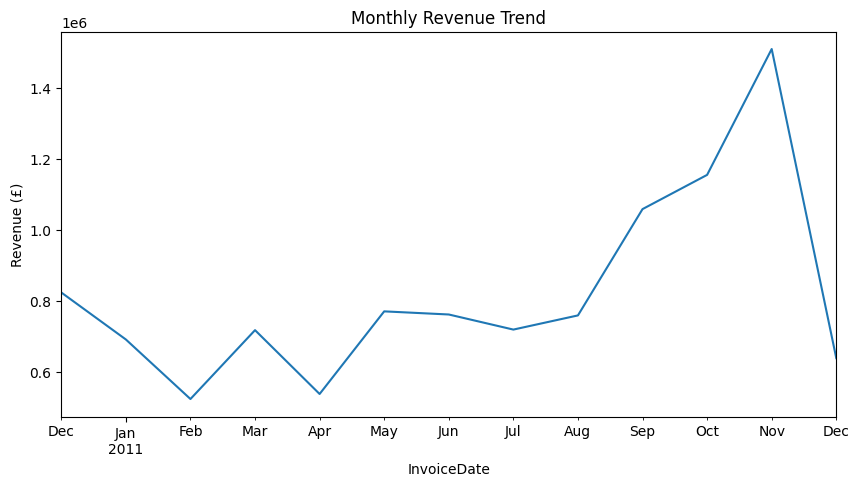

In [44]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])  # ensure datetime format
df_date_indexed = df_clean.set_index('InvoiceDate')  # set InvoiceDate as index
monthly_revenue = df_date_indexed['Revenue'].resample('M').sum()

print("Monthly Revenue Breakdown:")
print(monthly_revenue)

# Plot
monthly_revenue.plot(kind='line', title='Monthly Revenue Trend', ylabel='Revenue (£)', figsize=(10, 5))

### 4.5. Top 10 Countries by Revenue
Where are our best customers located?

Top 10 Countries + Others - Revenue & Percentage Share:

United Kingdom       £9,025,222.08   (84.61%)
Netherlands          £285,446.34   (2.68%)
EIRE                 £283,453.96   (2.66%)
Germany              £228,867.14   (2.15%)
France               £209,715.11   (1.97%)
Australia            £138,521.31   (1.30%)
Spain                £61,577.11   (0.58%)
Switzerland          £57,089.90   (0.54%)
Belgium              £41,196.34   (0.39%)
Sweden               £38,378.33   (0.36%)
Others               £297,216.92   (2.79%)


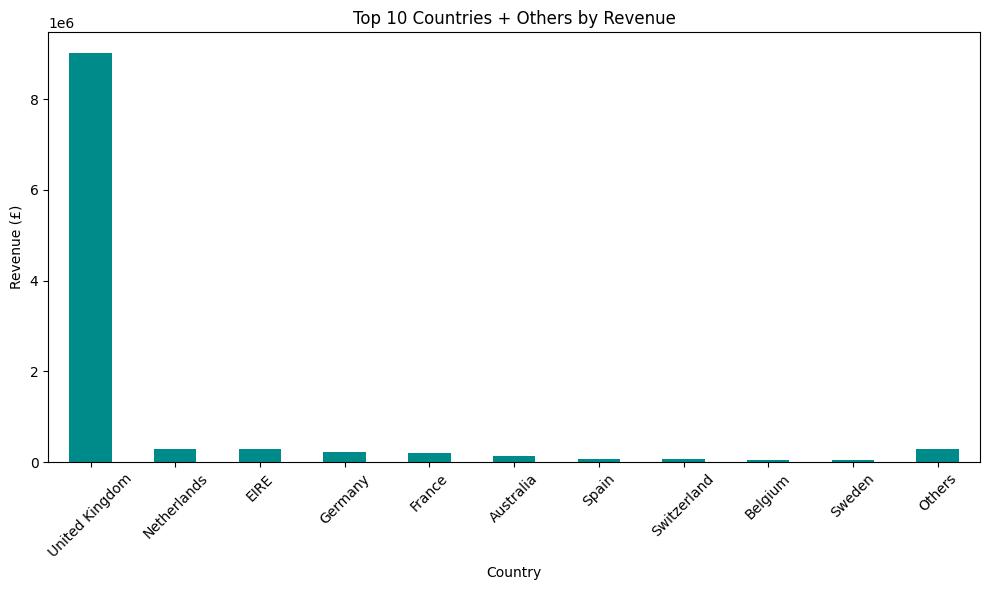

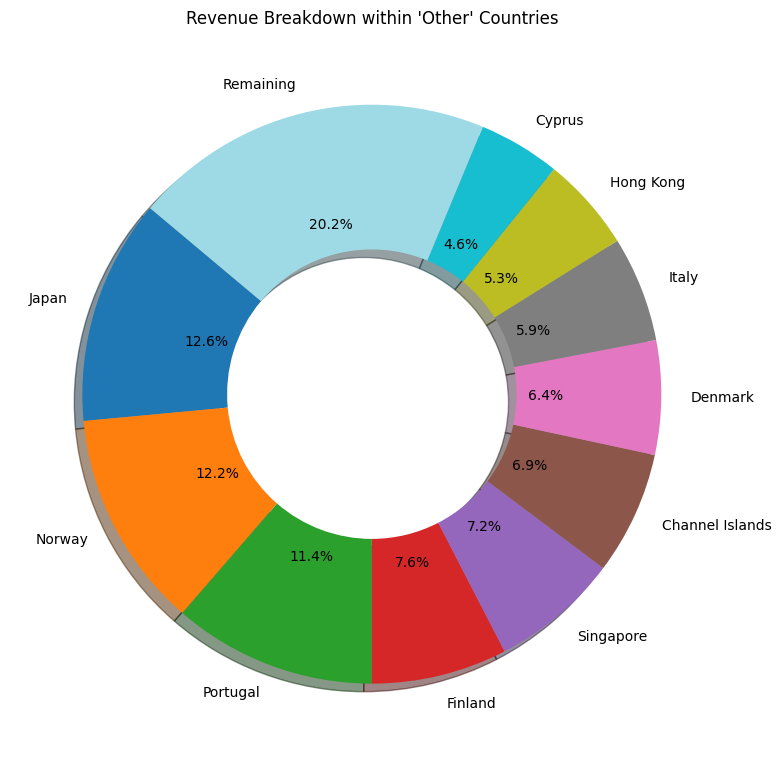

In [62]:
# Step 1: Calculate total revenue
total_revenue = df_clean['Revenue'].sum()

# Step 2: Group revenue by country
country_revenue = df_clean.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

# Step 3: Get top 10 + combine the rest into 'Others'
top_10 = country_revenue.head(10)
others = country_revenue[10:].sum()
top_10_with_others = top_10.copy()
top_10_with_others['Others'] = others

# Step 4: Calculate percentage share
country_percent = (top_10_with_others / total_revenue) * 100

# Step 5: Print country-wise revenue + percentage
print("Top 10 Countries + Others - Revenue & Percentage Share:\n")
for country, revenue in top_10_with_others.items():
    percent = country_percent[country]
    print(f"{country:<20} £{revenue:,.2f}   ({percent:.2f}%)")

# Step 6: Plot bar chart
plt.figure(figsize=(10, 6))
top_10_with_others.plot(kind='bar', color='darkcyan')
plt.title('Top 10 Countries + Others by Revenue')
plt.ylabel('Revenue (£)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 7: Pie chart for "Others" countries only
# Get all countries after top 10
other_countries = country_revenue[10:]

# Optional: pick top 10 within "Others" for clarity, rest into 'Remaining'
top_from_others = other_countries.head(10).copy()
top_from_others['Remaining'] = other_countries[10:].sum()

# Step 8: Plot pie chart for Others only
plt.figure(figsize=(8, 8))
top_from_others.plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    wedgeprops={'width': 0.5},
    cmap='tab20'
)
plt.title("Revenue Breakdown within 'Other' Countries")
plt.ylabel('')
plt.tight_layout()
plt.show()

### 4.6. Top 10 Products by Revenue
Which products are performing best?

Top 10 Products by Revenue:
Description
DOTCOM POSTAGE                        206248.77
REGENCY CAKESTAND 3 TIER              174484.74
PAPER CRAFT , LITTLE BIRDIE           168469.60
WHITE HANGING HEART T-LIGHT HOLDER    106292.77
PARTY BUNTING                          99504.33
JUMBO BAG RED RETROSPOT                94340.05
MEDIUM CERAMIC TOP STORAGE JAR         81700.92
Manual                                 78112.82
POSTAGE                                78101.88
RABBIT NIGHT LIGHT                     66964.99
Name: Revenue, dtype: float64


<Axes: title={'center': 'Top Selling Products by Revenue'}, xlabel='Revenue (£)', ylabel='Description'>

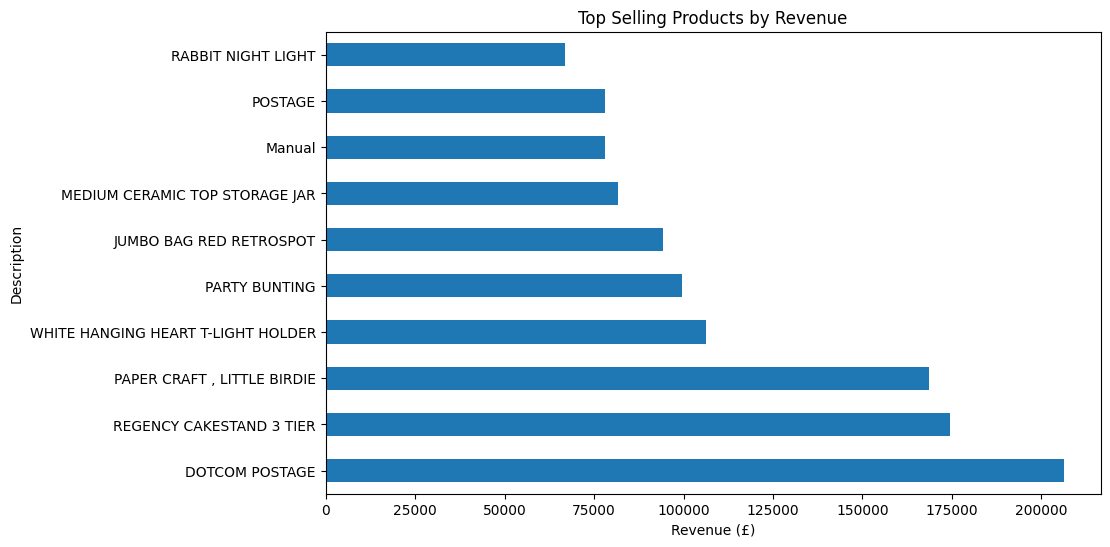

In [41]:
top_products = df_clean.groupby('Description')['Revenue'].sum().sort_values(ascending=False)
print("Top 10 Products by Revenue:")
print(top_products.head(10))

(top_products.head(10)).plot(kind='barh', title='Top Selling Products by Revenue', xlabel='Revenue (£)', figsize=(10, 6))

### 4.7. Repeat vs One-Time Customers
How many customers returned to buy again?

Repeat Customers: 4267
One-Time Customers: 71


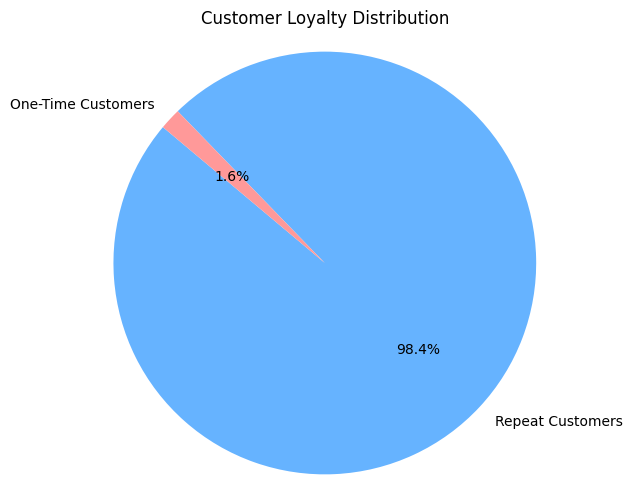

In [52]:
customer_freq = df_clean['CustomerID'].value_counts()
repeat_customers = (customer_freq > 1).sum()
new_customers = (customer_freq == 1).sum()

print(f"Repeat Customers: {repeat_customers}")
print(f"One-Time Customers: {new_customers}")

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie([repeat_customers, new_customers],
        labels=['Repeat Customers', 'One-Time Customers'],
        autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title("Customer Loyalty Distribution")
plt.axis('equal')
plt.show()

### 4.8. Top 10 Customers by Lifetime Revenue
Who are our most valuable customers?

Top 10 Customers by Revenue:
CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: Revenue, dtype: float64


<Axes: title={'center': 'Top Customers by Total Spend'}, xlabel='CustomerID', ylabel='Revenue (£)'>

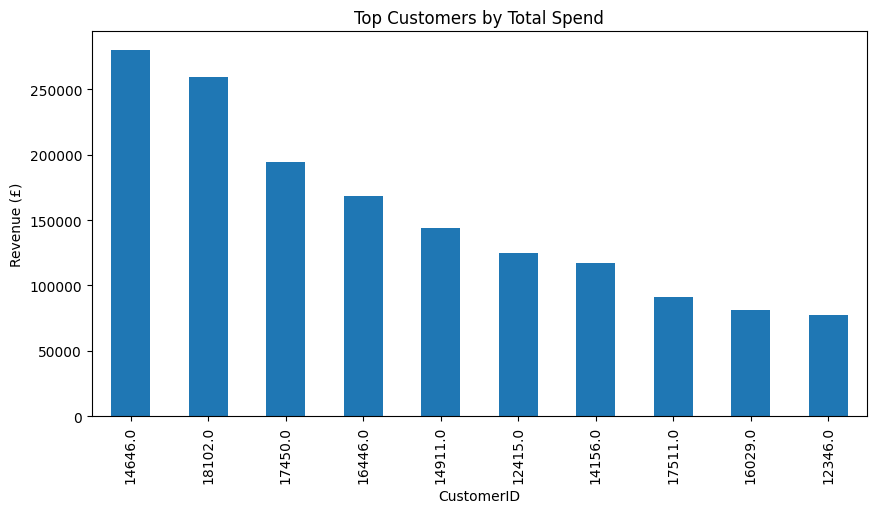

In [33]:
top_customers = df_clean.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Revenue:")
print(top_customers)

top_customers.plot(kind='bar', title='Top Customers by Total Spend', ylabel='Revenue (£)', figsize=(10, 5))

### 4.9. Customer Lifetime Value


Top 10 Customers by Lifetime Value (Simplified):
CustomerID
16446.0    84236.250000
12346.0    77183.600000
15749.0    14844.766667
15098.0    13305.500000
12357.0     6207.670000
12415.0     5948.310952
12590.0     4932.130000
12688.0     4873.810000
12752.0     4366.780000
18102.0     4327.621667
dtype: float64


<Axes: title={'center': 'Top 10 Customer Lifetime Value (CLV)'}, xlabel='CustomerID', ylabel='Avg Revenue per Order (£)'>

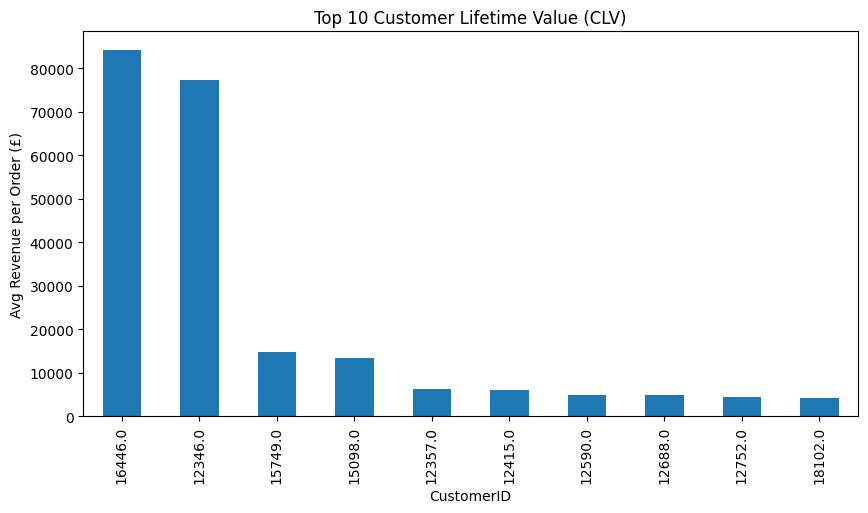

In [53]:
# Total revenue per customer
customer_revenue = df_clean.groupby('CustomerID')['Revenue'].sum()

# Number of purchases per customer
customer_orders = df_clean.groupby('CustomerID')['InvoiceNo'].nunique()

# CLV = total revenue / total orders
clv = (customer_revenue / customer_orders).sort_values(ascending=False)

# Display top 10 customers by CLV
print("Top 10 Customers by Lifetime Value (Simplified):")
print(clv.head(10))

# Plot top 10
clv.head(10).plot(kind='bar', title='Top 10 Customer Lifetime Value (CLV)', ylabel='Avg Revenue per Order (£)', figsize=(10, 5))


# THE END